## Select_and_copy_S3_Pea_Island

Use a lat/lon bounding box and image locations in the navigation files to copy a subset of images from an S3 bucket to a local directory. Make a quick plot of the image locations copied.

In [1]:
import os
import pandas as pd
import boto3
import matplotlib.pyplot as plt
%matplotlib inline

# bounding coords for all of Pea Island
latmin = 35.604
latmax = 35.775
lonmin = -75.54
lonmax = -75.44

# location of navigation files
parent_dir = 'C:\\crs\\proj\\2019_DorianOBX\\WayneWright_flights'
nav_files = ['2019_1011_ppk-photo-locations-mbase-GP144357.txt',\
             '2019_1011_ppk-photo-locations-mbase-GP171357-v2.txt']

# how many rows to skip at top of file?
skiprows = [35, 35]
path=[]
for i in range(len(nav_files)):
   path.append( os.path.join(parent_dir,nav_files[i]) )

# note that you have to run this for n=0 to number of nav files
n=0
df = pd.read_csv(path[n], skiprows=skiprows[n], header=None, delim_whitespace=True,\
                names = ['image_name','easting','northing','elev','lat','lon','ell','one',\
                         'SDHeight','SDHoriz','UTCDate','UTCTime','UTCSeconds'])
df.describe()

# Find images outside the bounding box and put them in a new, smaller dataframe called `dfs`
dfs = df[ (df['lat']>=latmin) & (df['lat']<=latmax) & (df['lon']>=lonmin) & (df['lon']<=lonmax) ]
print("Found {} images.".format(len(dfs)))

Found 453 images.


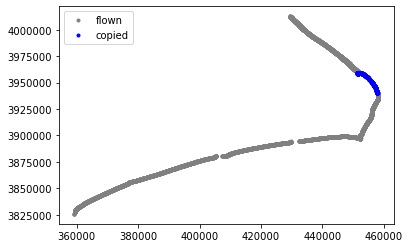

In [2]:
# Make a simple plot
easting = df['easting'].values
northing = df['northing'].values
eastings = dfs['easting'].values
northings = dfs['northing'].values
plt.plot(easting,northing,'.',color='gray',label='flown')
plt.plot(eastings,northings,'.',color='blue',label='copied')
plt.legend()
plt.show()

In [3]:
s3_resource = boto3.resource('s3')
bucket = s3_resource.Bucket('cmgp-sfm')

icount = 0
for f in dfs['image_name'].values :
    local_dest = 'D:\\data\\HxDorian_2019\\2019-10-11_CoreBx_dng\\'+f
    try:
        src_key = '2019-10_OBX/dng/144357/'+f
        bucket.download_file(src_key, local_dest)
        print("Copied "+local_dest)
        icount = icount +1
    except:
        print("Fail: "+src_key)
        try:
            src_key = '2019-10_OBX/dng/171357/'+f
            bucket.download_file(src_key, local_dest)
            print("Copied "+local_dest)
            icount = icount +1
        except:
            print("Fail: "+src_key)
            
print("Copied {} files.".format(icount))

Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150221-DSC00384-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150222-DSC00385-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150223-DSC00386-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150224-DSC00387-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150225-DSC00388-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150226-DSC00389-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150227-DSC00390-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150228-DSC00391-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150229-DSC00392-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150230-DSC00393-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150231-DSC00394-N7251F.dng
Copied D:\data\HxDorian_2019\201

Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150358-DSC00478-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150359-DSC00479-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150400-DSC00480-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150401-DSC00481-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150402-DSC00482-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150403-DSC00483-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150404-DSC00484-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150405-DSC00485-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150406-DSC00486-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150407-DSC00487-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150409-DSC00488-N7251F.dng
Copied D:\data\HxDorian_2019\201

Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150538-DSC00572-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150539-DSC00573-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150540-DSC00574-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150542-DSC00575-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150543-DSC00576-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150544-DSC00577-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150545-DSC00578-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150546-DSC00579-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150547-DSC00580-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150548-DSC00581-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150549-DSC00582-N7251F.dng
Copied D:\data\HxDorian_2019\201

Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150719-DSC00666-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150720-DSC00667-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150721-DSC00668-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150722-DSC00669-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150723-DSC00670-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150724-DSC00671-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150725-DSC00672-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150727-DSC00673-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150728-DSC00674-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150729-DSC00675-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150730-DSC00676-N7251F.dng
Copied D:\data\HxDorian_2019\201

Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150857-DSC00760-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150858-DSC00761-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150859-DSC00762-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150900-DSC00763-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150901-DSC00764-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150902-DSC00765-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150903-DSC00766-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150904-DSC00767-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150905-DSC00768-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150906-DSC00769-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150907-DSC00770-N7251F.dng
Copied D:\data\HxDorian_2019\201

Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151035-DSC00854-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151036-DSC00855-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151037-DSC00856-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151038-DSC00857-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151039-DSC00858-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151040-DSC00859-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151041-DSC00860-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151042-DSC00861-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151043-DSC00862-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151044-DSC00863-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151045-DSC00864-N7251F.dng
Copied D:\data\HxDorian_2019\201

Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151213-DSC00948-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151214-DSC00949-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151215-DSC00950-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151216-DSC00951-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151217-DSC00952-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151219-DSC00953-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151220-DSC00954-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151221-DSC00955-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151222-DSC00956-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151223-DSC00957-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151224-DSC00958-N7251F.dng
Copied D:\data\HxDorian_2019\201

Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151352-DSC01042-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151353-DSC01043-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151354-DSC01044-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151355-DSC01045-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151356-DSC01046-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151357-DSC01047-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151358-DSC01048-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151359-DSC01049-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151400-DSC01050-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151401-DSC01051-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-151402-DSC01052-N7251F.dng
Copied D:\data\HxDorian_2019\201